In [1]:
import os
import sys

#Get the absolute path to the parent of current working directory 
cwd    = os.getcwd()
source_path = os.path.join(cwd, 'source')
sys.path.append(source_path)
sys.path

import eoMosaic as stacMoz
import eoImage as eoIM

In [2]:
from dask.distributed import LocalCluster
 
cluster = LocalCluster(n_workers = 5, threads_per_worker = 4) # Refined through testing
client = cluster.get_client()
client # Can open in other window by clicking 'Dashboard' link below

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 20,Total memory: 95.91 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:53550,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 20
Started: Just now,Total memory: 95.91 GiB
Comm: tcp://127.0.0.1:53580,Total threads: 4
Dashboard: http://127.0.0.1:53586/status,Memory: 19.18 GiB
Nanny: tcp://127.0.0.1:53553,


In [3]:
ottawa_region = {
    'type': 'Polygon',
    'coordinates': [
       [
         [-76.120,45.184], 
         [-75.383,45.171],
         [-75.390,45.564], 
         [-76.105,45.568], 
         [-76.120,45.184]
       ]
    ]
}


sub_region = {
    'type': 'Polygon',
    'coordinates': [
       [[-78.6303, 44.2113], [-77.04546666666667, 44.2113], [-77.04546666666667, 45.318], [-78.6303, 45.318], [-78.6303, 44.2113]]
    ]
}

params = {
    'sensor': 'S2_SR',           # A sensor type string (e.g., 'S2_SR' or 'L8_SR' or 'MOD_SR')
    'unit': 2,                   # A data unit code (1 or 2 for TOA or surface reflectance)    
    'year': 2022,                # An integer representing image acquisition year
    'nbYears': -1,               # positive int for annual product, or negative int for monthly product
    'months': [8],               # A list of integers represening one or multiple monthes     
    'tile_names': ['tile42_922'], # A list of (sub-)tile names (defined using CCRS' tile griding system) 
    'prod_names': ['mosaic'],    #['mosaic', 'LAI', 'fCOVER', ]    
    'resolution': 20,            # Exporting spatial resolution    
    'out_folder': 'D:/WorkSpace/test_xr_output',        # the folder name for exporting
    'projection': 'EPSG:3979', 
    
    #'start_date': '2022-06-15',
    #'end_date': '2022-09-15'
}

In [4]:
#base_img = stacMoz.get_base_Image(ssr_data, sub_region, 'EPSG:3979', 100, start_str, end_str)
#base_img = eoIM.attach_AngleBands(base_img, ssr_data)

mosaic = stacMoz.period_mosaic(params)
#sub_mosaic = stacMoz.get_sub_mosaic(ssr_data, sub_region, 'EPSG:3979', 200, start_str, end_str)

#base_img = eoIM.apply_gain_offset(base_img, ssr_data, 100, False)
#base_img.odc.geobox
#display(mosaic)

stacMoz.export_mosaic(params, mosaic)

Found: 315 datasets
<get_base_Image> The bbox of the given region =  [-117.7869, 52.4298, -111.9116, 55.8769]
<period_mosaic> create a sub-mosaic for  [[-117.7869, 52.4298], [-115.82846666666667, 52.4298], [-115.82846666666667, 53.578833333333336], [-117.7869, 53.578833333333336], [-117.7869, 52.4298]]
Found: 43 datasets
<get_sub_mosaic> The bbox of the given region =  [-117.7869, 52.4298, -115.82846666666667, 53.578833333333336]

Finished applying gain and offset


<get_score_refers> median image =  <xarray.Dataset> Size: 2GB
Dimensions:      (y: 8120, x: 8228)
Coordinates:
  * y            (y) float64 65kB 7.687e+05 7.687e+05 ... 6.064e+05 6.064e+05
  * x            (x) float64 66kB -1.499e+06 -1.499e+06 ... -1.334e+06
    spatial_ref  int32 4B 3979
Data variables:
    blue         (y, x) float32 267MB nan nan nan nan nan ... nan nan nan nan
    green        (y, x) float32 267MB nan nan nan nan nan ... nan nan nan nan
    red          (y, x) float32 267MB nan nan nan nan nan ... nan 

RasterioIOError: '/vsicurl/https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/12/U/VF/2022/1/S2A_12UVF_20220114_0_L2A/B03.tif' does not exist in the file system, and is not recognized as a supported dataset name.

In [ ]:
#%%time
#stac_IC = stac_IC.compute()

# actually load it
#from dask.diagnostics import ProgressBar
#with ProgressBar():
#  base_Img.load()

#stac_IC.red.plot.imshow(col="time")
display(base_Img)

'\nmasked_IC.isel(time=5).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)\nmasked_IC.isel(time=15).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)\nmasked_IC.isel(time=24).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)\n'

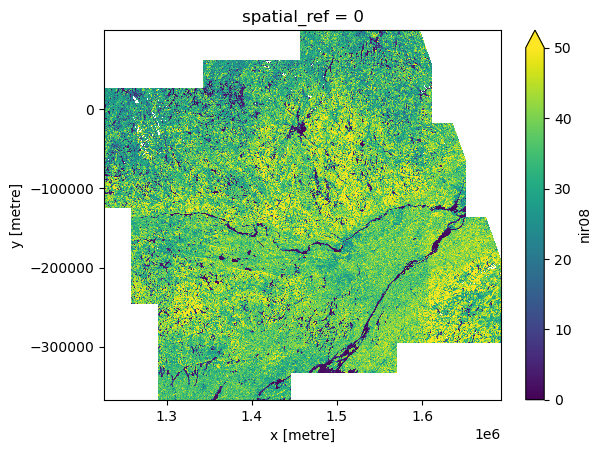

In [4]:
'''
scl = stac_IC.scl
condition = (stac_IC > 0) & (scl != 3) & (scl != 8) & (scl != 9)  # & (scl != 10)
masked_IC = stac_IC.where(condition)

median_image = masked_IC.median(dim='time')
'''

mosaic.nir08.plot.imshow(vmin=0, vmax=50)

'''
masked_IC.isel(time=5).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)
masked_IC.isel(time=15).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)
masked_IC.isel(time=24).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)
'''

In [6]:
scored_img_coll = stacM.attach_score(stac_IC)
display(scored_img_coll)

<xarray.Dataset> Size: 53GB
Dimensions:      (y: 27909, x: 25226, time: 5)
Coordinates:
  * y            (y) float64 223kB 1.41e+05 1.41e+05 ... -4.171e+05 -4.171e+05
  * x            (x) float64 202kB 1.209e+06 1.209e+06 ... 1.714e+06 1.714e+06
    spatial_ref  int32 4B 3979
  * time         (time) datetime64[ns] 40B 2022-07-02T16:11:17.032000 ... 202...
Data variables:
    blue         (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    green        (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    red          (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    nir08        (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    swir16       (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    swir22       (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    scl          (time, y, x) uint8 4GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    score        (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0

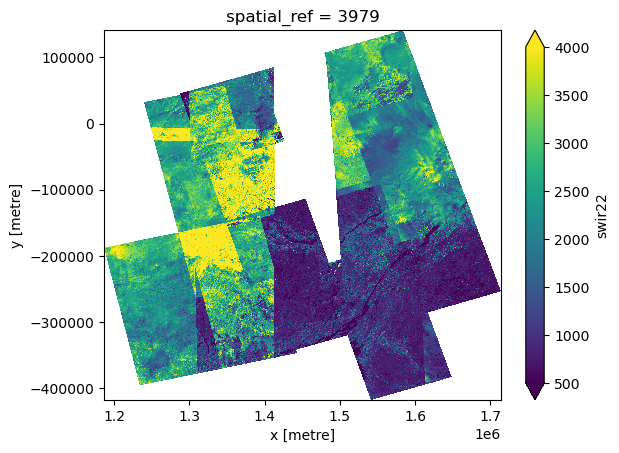

In [6]:
median_image.swir22.plot.imshow(vmin=500, vmax=4000)

In [9]:
stac_IC.sizes['time']

7

In [3]:
import xarray as xr
import numpy as np

# Step 1: Import the required modules (done)

# Step 2: Create a simple xarray dataset
data1 = np.random.rand(4, 3)
data2 = np.random.randint(0, 100, size=(4, 3))

ds = xr.Dataset(
    {
        "temperature": (("x", "y"), data1),
        "precipitation": (("x", "y"), data2)
    },
    coords={
        "x": [0, 1, 2, 3],
        "y": [0, 1, 2]
    }
)

print("Original Data Types:")
print(ds) 

# Step 3: Change the data type of the 'temperature' and 'precipitation' variables
ds = ds.astype(np.float32)


print("\n\nNew Data Types:")
print(ds)  # Output: float32


Original Data Types:
<xarray.Dataset> Size: 172B
Dimensions:        (x: 4, y: 3)
Coordinates:
  * x              (x) int32 16B 0 1 2 3
  * y              (y) int32 12B 0 1 2
Data variables:
    temperature    (x, y) float64 96B 0.5453 0.5308 0.7008 ... 0.4494 0.9391
    precipitation  (x, y) int32 48B 70 82 10 29 18 89 30 11 7 77 11 57


New Data Types:
<xarray.Dataset> Size: 124B
Dimensions:        (x: 4, y: 3)
Coordinates:
  * x              (x) int32 16B 0 1 2 3
  * y              (y) int32 12B 0 1 2
Data variables:
    temperature    (x, y) float32 48B 0.5453 0.5308 0.7008 ... 0.4494 0.9391
    precipitation  (x, y) float32 48B 70.0 82.0 10.0 29.0 ... 7.0 77.0 11.0 57.0


In [5]:
import certifi
certifi.where()

'C:\\Users\\lsun\\Anaconda3\\envs\\stac\\Lib\\site-packages\\certifi\\cacert.pem'

In [5]:
import requests
import pystac

# Define the GEE STAC API URL
gee_stac_api_url = "https://earthengine-stac.storage.googleapis.com/catalog/catalog.json"

# Fetch the GEE catalog
response = requests.get(gee_stac_api_url)
catalog_dict = response.json()

# Create a STAC catalog object
catalog = pystac.Catalog.from_dict(catalog_dict)

# Print the catalog description
print(f"Title: {catalog.title}")
print(f"Description: {catalog.description}")

# List all collections in the catalog
collections = list(catalog.get_all_collections())
for collection in collections:
    print(f"Collection ID: {collection.id}")
    print(f"Collection Title: {collection.title}")
    print(f"Collection Description: {collection.description}\n")




Title: Google Earth Engine Catalog
Description: The [Earth Engine](https://earthengine.google.com/) Public Data Catalog.

See also:

- [HTML version of the catalog](https://developers.google.com/earth-engine/datasets/catalog)
- [STAC Browser version](https://radiantearth.github.io/stac-browser/#/external/storage.googleapis.com/earthengine-stac/catalog/catalog.json)



C:\Users\lsun\AppData\Local\anaconda3\envs\stac\Lib\site-packages\pystac\collection.py:702: DeprecatedWarning: The collection 'ACA/reef_habitat/v1_0' is deprecated.
  warnings.warn(
C:\Users\lsun\AppData\Local\anaconda3\envs\stac\Lib\site-packages\pystac\collection.py:702: DeprecatedWarning: The collection 'CAS/IGSNRR/PML/V2' is deprecated.
  warnings.warn(
C:\Users\lsun\AppData\Local\anaconda3\envs\stac\Lib\site-packages\pystac\collection.py:702: DeprecatedWarning: The collection 'CIESIN/GPWv4/ancillary-data-grids' is deprecated.
  warnings.warn(
C:\Users\lsun\AppData\Local\anaconda3\envs\stac\Lib\site-packages\pystac\collection.py:702: DeprecatedWarning: The collection 'CIESIN/GPWv4/population-count' is deprecated.
  warnings.warn(
C:\Users\lsun\AppData\Local\anaconda3\envs\stac\Lib\site-packages\pystac\collection.py:702: DeprecatedWarning: The collection 'CIESIN/GPWv4/population-density' is deprecated.
  warnings.warn(
C:\Users\lsun\AppData\Local\anaconda3\envs\stac\Lib\site-package

Collection ID: AAFC/ACI
Collection Title: Canada AAFC Annual Crop Inventory
Collection Description: Starting in 2009, the Earth Observation Team of the Science and Technology
Branch (STB) at Agriculture and Agri-Food Canada (AAFC) began the process
of generating annual crop type digital maps. Focusing on the Prairie
Provinces in 2009 and 2010, a Decision Tree (DT) based methodology was
applied using optical (Landsat-5, AWiFS, DMC) and radar (Radarsat-2) based
satellite images. Beginning with the 2011 growing season, this activity has
been extended to other provinces in support of a national crop inventory.
To date this approach can consistently deliver a crop inventory that meets
the overall target accuracy of at least 85% at a final spatial resolution of
30m (56m in 2009 and 2010).


Collection ID: ACA/reef_habitat/v1_0
Collection Title: Allen Coral Atlas (ACA) - Geomorphic Zonation and Benthic Habitat - v1.0 [deprecated]
Collection Description: The [Allen Coral Atlas](https://allenco